# 4.Subway EDA

## 4.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
subway_df = pd.read_csv('./data/subway_cleaned.csv')

## 4.2 Overview

In [3]:
subway_df.head()

,exact_date,exact_time,day_of_week,station,code,delay_min,gap_min,bound,line,vehicle,year,month,day,hour,min,at_station,line_simp,delay_type
0,2014-01-01,10:25:00 AM,Wednesday,COXWELL STATION,MUTO,5,11,W,BD,5315,2014,1,1,10,25,1,BD,short
1,2014-01-01,11:20:00 AM,Wednesday,DUFFERIN STATION,MUIR,7,12,W,BD,5015,2014,1,1,11,20,1,BD,short
2,2014-01-01,11:22:00 PM,Wednesday,VICTORIA PARK STATION,SUAP,0,0,NaN,BD,0,2014,1,1,23,22,1,BD,on time
3,2014-01-01,12:04:00 PM,Wednesday,QUEEN STATION,SUO,4,8,S,YU,5681,2014,1,1,12,4,1,YU,short
4,2014-01-01,12:21:00 AM,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,0,21,1,BD,long


In [4]:
print("There's %s records of incident and %s columns in the subway dataset."%(subway_df.shape[0],subway_df.shape[1]))

There's 113389 records of incident and 18 columns in the subway dataset.


In [5]:
print('This subway dataset starts from %s to %s.'%(subway_df.iloc[0]['exact_date'],subway_df.iloc[-1]['exact_date']))

This subway dataset starts from 2014-01-01 to 2020-06-30.


## 4.3 Check Missing values

In [6]:
missing_vals_subway = (subway_df.isnull().sum() / subway_df.shape[0]) * 100 
missing_vals_subway[missing_vals_subway > 0].sort_values(ascending=False)

bound        22.373422
line_simp     0.448897
line          0.364233
code          0.000882
dtype: float64

### Insights
- There's about one fourth of the Bound data missing.

In [7]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

## 4.4 Analyzing Continuous Variables (using distribution graphs, boxplots, quantiles and correlation matrix)

Continuous variables are: exact date, exact time, year, month, day, hour, minute, delay_min, gap_min, vehicle

### 4.4.1 Delay by Date Counts

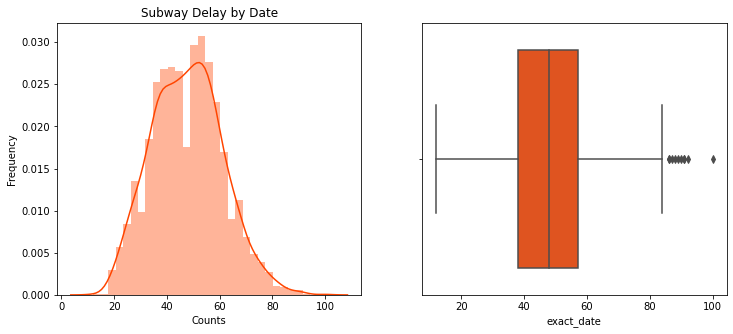

In [8]:
subway_date_counts = subway_df.exact_date.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(subway_date_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Subway Delay by Date");

sns.boxplot(subway_date_counts, ax=ax[1], color="orangered");

In [9]:
# a function to find quantiles, or where most data are.
def compute_quantiles(col_counts):
    Q1 =  np.quantile(col_counts, 0.25)
    Q3 =  np.quantile(col_counts, 0.75)
    IQR = Q3 - Q1
    print('Most data are within %d to %d.'%(Q1,Q3))
    print('Median is', np.quantile(col_counts, 0.5))
    print('The data are usually below %d.'%np.quantile(col_counts, 0.95))
    
    lower_fence = Q1 - 1.5 * (IQR)
    upper_fence = Q3  + 1.5 * (IQR)
    outlier = col_counts[col_counts < lower_fence].sum() + col_counts[col_counts > upper_fence].sum()
    print('Anything above %d and below %d is an outlier.'%(upper_fence,lower_fence))
    print("There are %d outliers." %outlier)
    print('Most occurence is %d of %s.' %(col_counts.max(), col_counts.index[0]))

In [10]:
compute_quantiles(subway_date_counts)

Most data are within 38 to 57.
Median is 48.0
The data are usually below 70.
Anything above 85 and below 9 is an outlier.
There are 900 outliers.
Most occurence is 100 of 2014-02-05.


### Insights
- Most dates have range from roughly 38 to 57 delays.
- More than 70 delays per day is very seldom.
- The most delay per day happened on 2014-02-05 with 100 delays.
- There are 900 outliers.

### 4.4.2 Delay by Exact Time Counts

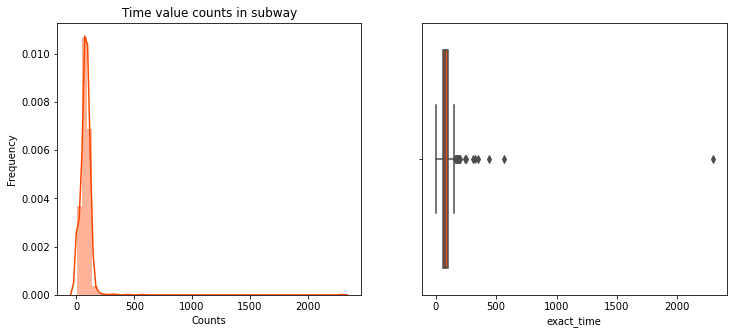

In [11]:
subway_time_counts = subway_df.exact_time.value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.distplot(subway_time_counts, ax=ax[0], color="orangered", kde=True);
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Time value counts in subway");

sns.boxplot(subway_time_counts, ax=ax[1], color="orangered");

In [12]:
compute_quantiles(subway_time_counts)

Most data are within 59 to 100.
Median is 79.0
The data are usually below 129.
Anything above 161 and below -2 is an outlier.
There are 6744 outliers.
Most occurence is 2294 of 10:00:00 PM.


### Insights
- A heavily right skewed distribution shown above, it shows thatcertain period is prone to have more delays than the others. 
- There's an extreme outlier with 2294 delays at 10PM.
- Most of the time we have 59 to roughly 100 delays.

### 4.4.3 More on continuous variables

In [13]:
subway_df.columns

Index(['exact_date', 'exact_time', 'day_of_week', 'station', 'code',
       'delay_min', 'gap_min', 'bound', 'line', 'vehicle', 'year', 'month',
       'day', 'hour', 'min', 'at_station', 'line_simp', 'delay_type'],
      dtype='object')

In [14]:
# initialize continuous variables
subway_cont = subway_df[['year','month','day','hour','min','delay_min','gap_min','vehicle']]

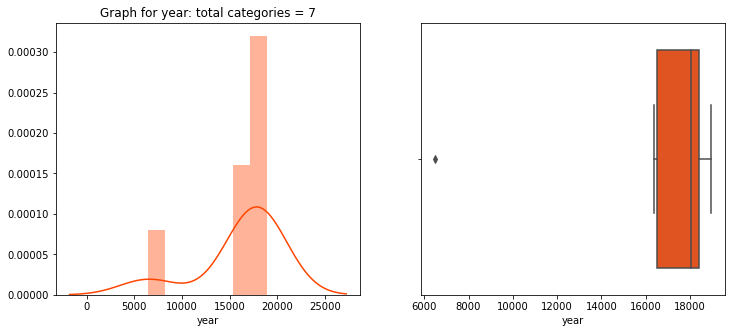

Most data are within 16521 to 18431.
Median is 18037.0
The data are usually below 18927.
Anything above 21295 and below 13657 is an outlier.
There are 6473 outliers.
Most occurence is 18974 of 2015.




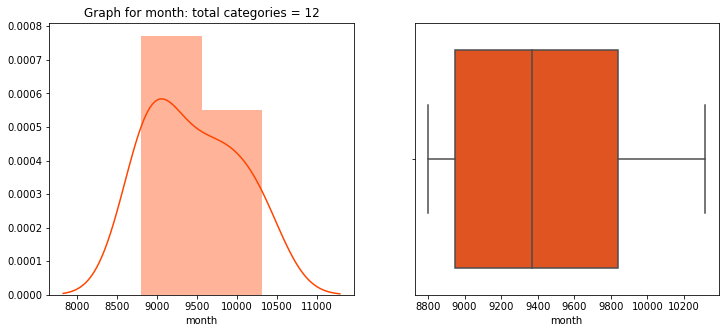

Most data are within 8947 to 9838.
Median is 9366.5
The data are usually below 10298.
Anything above 11174 and below 7612 is an outlier.
There are 0 outliers.
Most occurence is 10315 of 3.




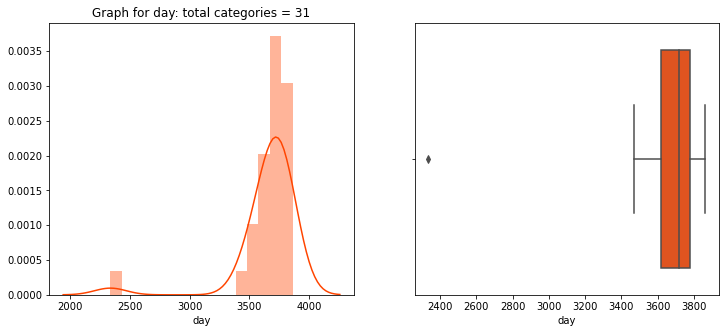

Most data are within 3619 to 3776.
Median is 3717.0
The data are usually below 3826.
Anything above 4012 and below 3382 is an outlier.
There are 2335 outliers.
Most occurence is 3862 of 10.




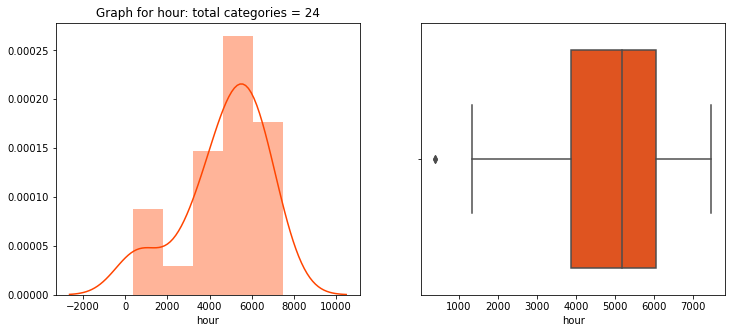

Most data are within 3877 to 6043.
Median is 5161.5
The data are usually below 6970.
Anything above 9290 and below 629 is an outlier.
There are 773 outliers.
Most occurence is 7464 of 8.




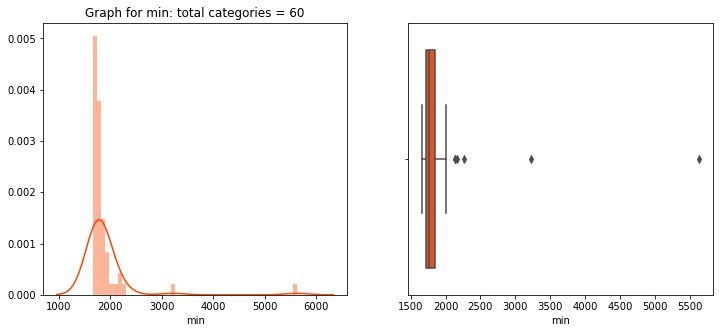

Most data are within 1724 to 1842.
Median is 1759.5
The data are usually below 2168.
Anything above 2019 and below 1547 is an outlier.
There are 17550 outliers.
Most occurence is 5625 of 0.




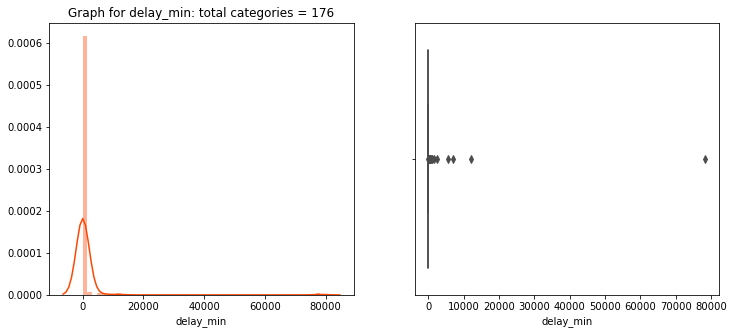

Most data are within 1 to 10.
Median is 2.0
The data are usually below 582.
Anything above 23 and below -12 is an outlier.
There are 112842 outliers.
Most occurence is 78306 of 0.




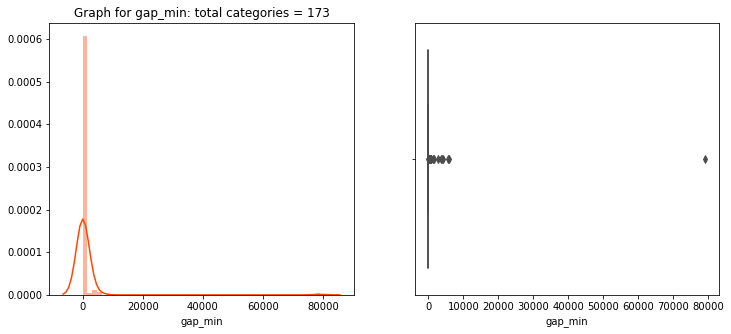

Most data are within 1 to 10.
Median is 3.0
The data are usually below 1044.
Anything above 23 and below -12 is an outlier.
There are 112897 outliers.
Most occurence is 79085 of 0.




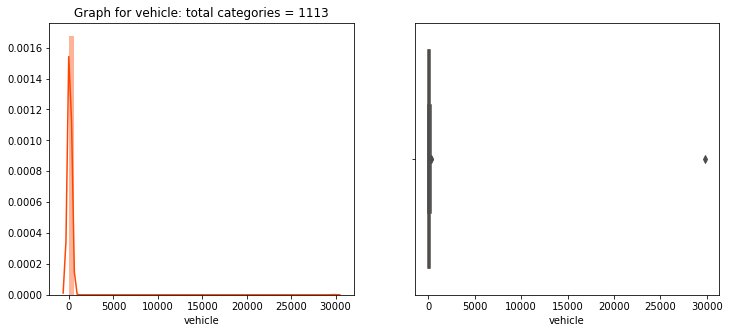

Most data are within 1 to 128.
Median is 61.0
The data are usually below 248.
Anything above 318 and below -189 is an outlier.
There are 30458 outliers.
Most occurence is 29809 of 0.




In [15]:
# Using a for loop to plot each continous variables and compute quantiles.
for col in subway_cont.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    cont_num = subway_cont[col].value_counts()
    chart = sns.distplot(cont_num, ax=ax[0], color="orangered", kde=True)
    ax[0].set_title("Graph for %s: total categories = %d" %(col, len(cont_num)))
    sns.boxplot(cont_num, ax=ax[1], color="orangered")
    plt.show()

    compute_quantiles(cont_num)
    print('\n')

### Insights

The graphs that are more skewed show that:
- 2015 has the most number of delays with 19000 in total.
- Out of all days, day 10 has the most records of delay, 7464.
- most delays are recorded at exactly 0 minute of the hour. 
- most delays are 0 minutes long with 78306 occurences.
- most gaps are 0 mins long with 79085 occurences.

The relatively normal distributed graphs are: (hour vs time)?
- March with 10300 tops to be the month of most occurence delays.

### 4.4.4 Correlation Matrix

<AxesSubplot:>

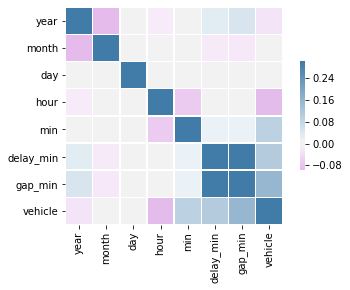

In [16]:
# check correlations between continuous variables
cmap = sns.diverging_palette(660, 600, as_cmap=True);
sns.heatmap(subway_cont.corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights:
- Similar to the bus dataset, delays and gaps are positive correlated.
- Anything other than delays and gaps have no correlations.

## 4.5 Analyzing Categorical Variables (using bar graphs)

In [17]:
# dataframe for categorical variables
subway_cat = subway_df[['year','month','day','hour','day_of_week','bound', 'at_station', 'line_simp','delay_type']]

### 4.5.1 Bar Graphs

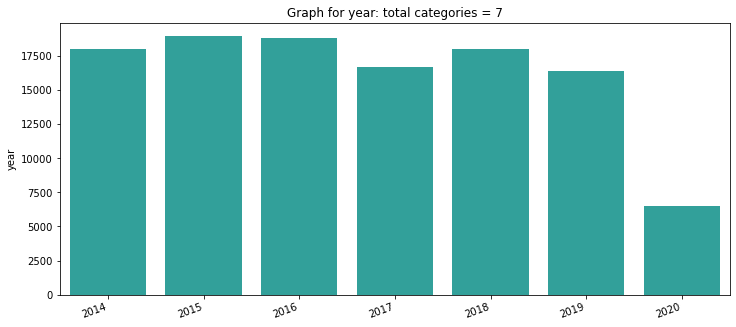

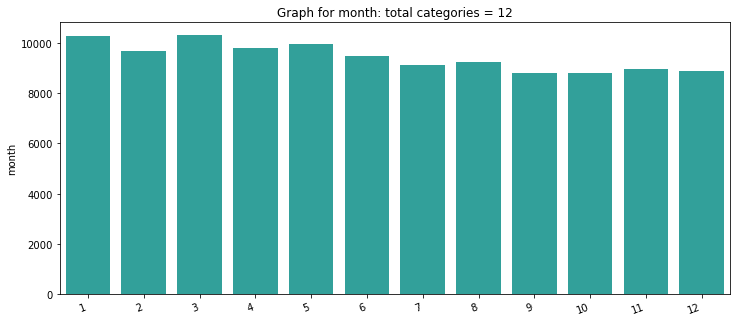

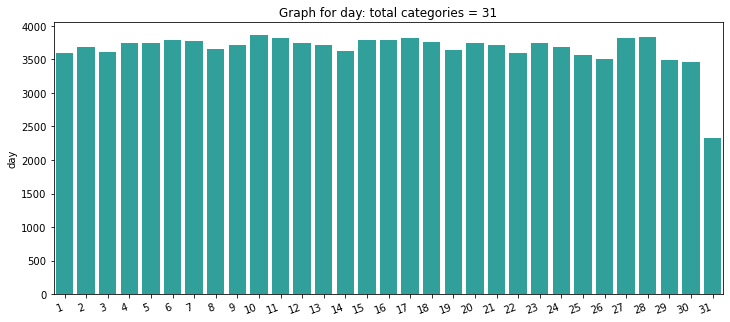

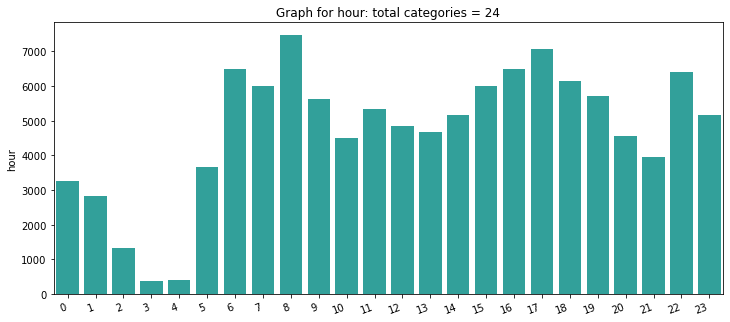

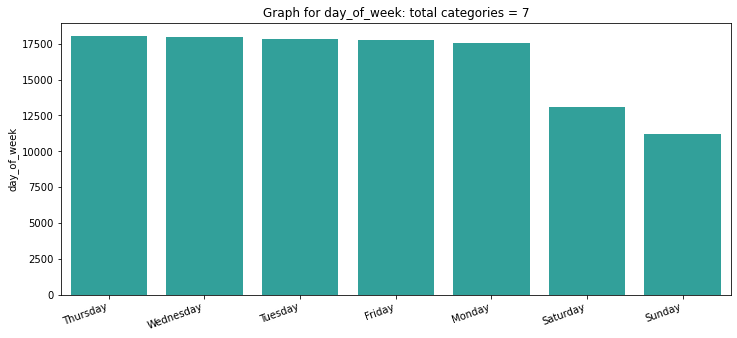

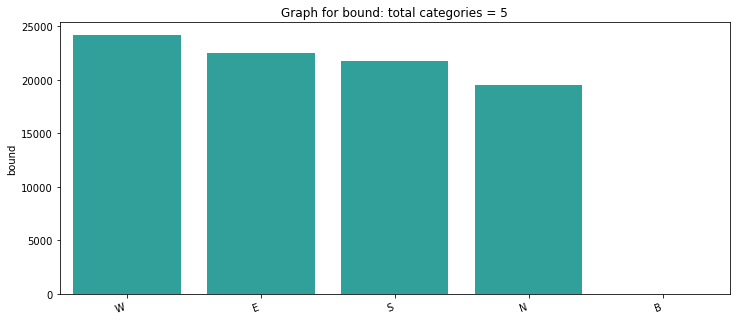

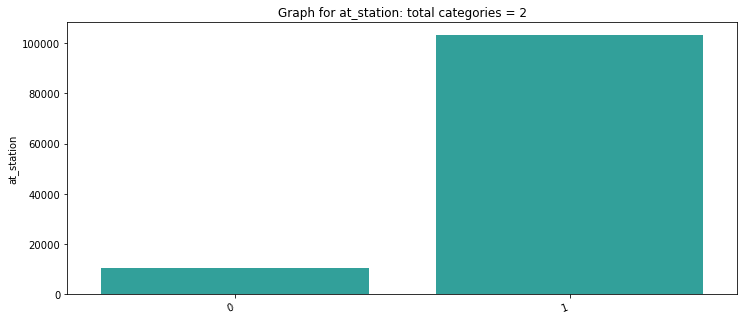

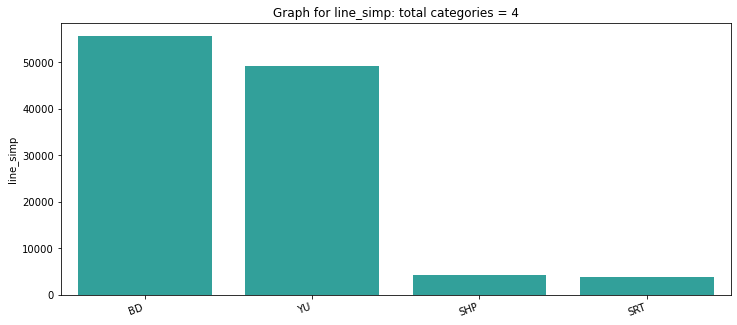

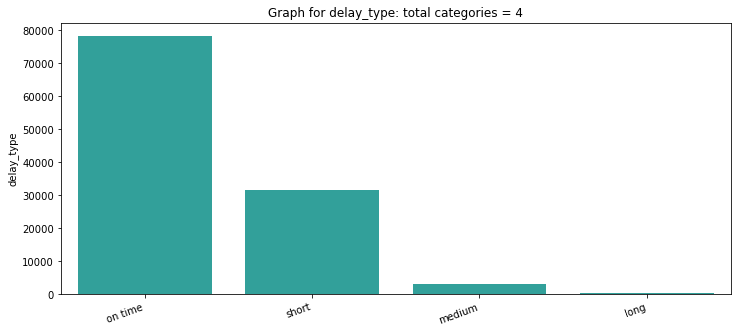

In [18]:
# Inspired by Ken Jee
# Using a for loop to plot each categorical variable.
for col in subway_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = subway_cat[col].value_counts()
    plt.title("Graph for %s: total categories = %d" %(col, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num,color="lightseagreen")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()

### Insights
Graph for year:
- 2015 to 2019 are pretty even in this case.
- Although 2020 has the least number of delay recorded, keep in mind that we only have 6 months of data from 2020 and there's a pandemic in this year.

Graph for month:
- January and March both peaked of this graph.

Graph for day:
- We observe that day 10, 28 and 29 peak in this graph meaning that delays are more likely to happen in the middle and end of the month.

Graph of hour:
- 8 AM have the most recorded delays. 3AM to 4 AM have the least record of delays.

Graph for day:
- We observe that the weekdays have almost twice more delays than weekends.
- The weekdays are pretty even.

Graph for bound:
- More subway trains are likely to be delayed going west followed by east, south and north.
- Subway trains going both ways are not as likely to be delayed as there are not many trains operate on heading both ways.

Graph for at_station:
- Most trains are delay at a station.

Graph for line:
- Most delays occured at the Bloor-Danforth line followed by Yonge-University
- Sheppard line and Scarborough line both have the least number of delays.

Graph for delay type:
- We observe that most trains were actually on time, meaning there was an incident recorded but the incident was quickly fixed and no delay caused by it.
- Short delays have about 30000 records.
- Medium to long delays are really seldom in this case.

## 4.6 Top 10's (Using Countplot)

### 4.6.1 Top 10 Delay Code

There are roughly 200 different delay codes for subway trains. So, we are only going to look at the top 10 delay code.

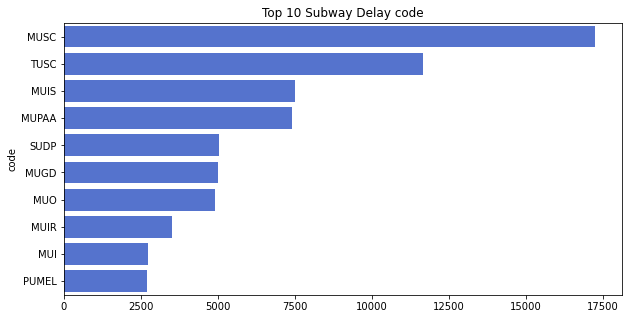

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y=subway_df.code, order= subway_df.code.value_counts().iloc[:10].index, color="royalblue")
plt.title("Top 10 Subway Delay code")
plt.xlabel('');

Read more about subway delay: [ttc-subway-delay-codes](https://open.toronto.ca/dataset/ttc-subway-delay-data/)

According to TTC subway delay code description:
- MUSC: Miscellaneous Speed Control
- TUSC: Operator Overspeeding
- MUIS: Injured or ill Customer (In Station) - Transported
- MUPAA: Passenger Assistance Alarm Activated - No Trouble Found
- SUDP: Disorderly Patron
- MUO: Miscellaneous Other
- MUGD: Miscellaneous General Delays
- MUIR: Injured or ill Customer (On Train) - Medical Aid Refused
- MUI: Injured or ill Customer (On Train) - Transported
- TUMVS: Operator Violated Signal


### 4.6.2 Top 10 delay by Subway Station

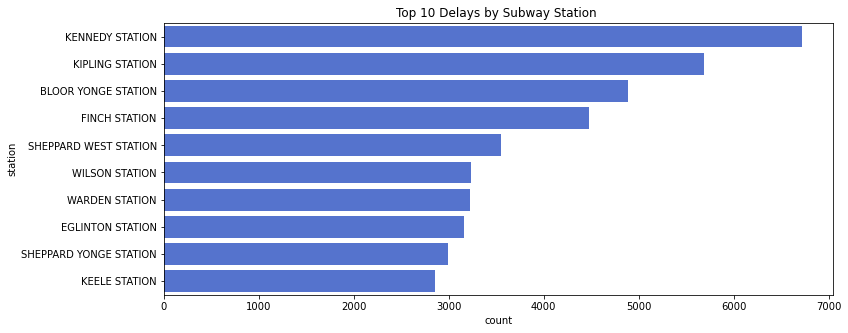

In [20]:
# only plotting stations
only_station = subway_df[subway_df.station.str.contains('STATION')]

plt.figure(figsize=(12,5))
sns.countplot(y=only_station.station, order= only_station.station.value_counts().iloc[:10].index, color="royalblue");
plt.title("Top 10 Delays by Subway Station ");

### Insights:
    - 3 out of 4 subway interchange stations, Kennedy, Bloor Yonge and Sheppard Yonge stations are ranking first, third and ninth places.
    - Kipling and Finch are both terminal stations, ranking in second and fourth places.
    - 7 out of 10 stations in this graph are associated to Line 1, followed by 4 stations associate to Line 2.
    - Top 4 stations are either a terminal or an interchange station.
    

## 4.7 Comparing delay vs others (using bar graphs)

### 4.7.1 Delays vs Day of the Week

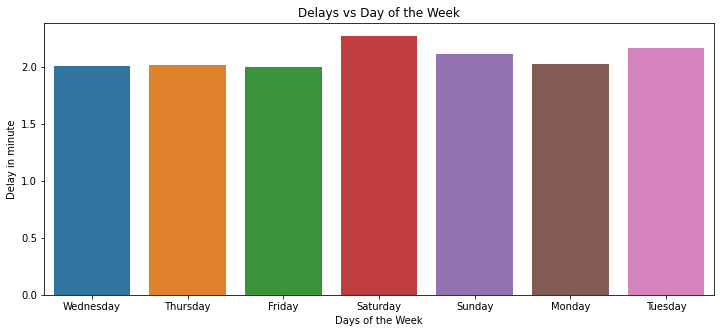

In [21]:
plt.figure(figsize=(12,5));
sns.barplot(x='day_of_week', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Day of the Week");
plt.xlabel("Days of the Week");
plt.ylabel("Delay in minute");

### Insights
- Saturdays have the longest delay time while having the second least delay record.

### 4.7.2 Delays vs Hour

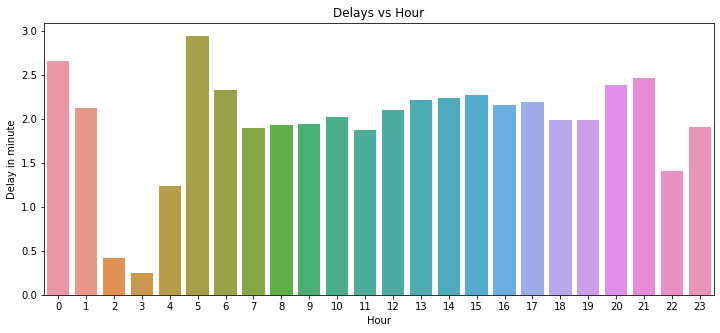

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='hour', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Hour")
plt.xlabel("Hour")
plt.ylabel("Delay in minute");

### Insights
- During rush hours the delays are roughly 2 minutes long
- Some of the longer delays happened at 12 AM and 5 AM

### 4.7.3 Delays vs Subway Bound

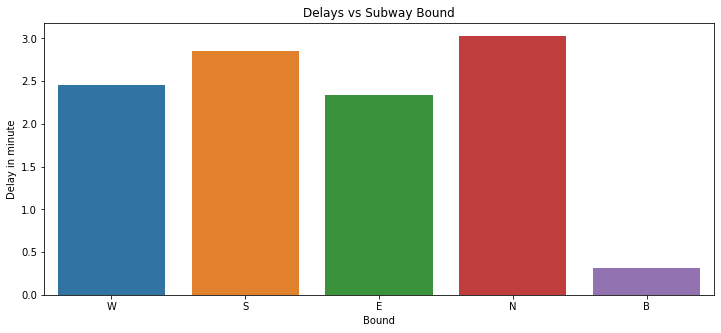

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='bound', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Subway Bound")
plt.xlabel("Bound")
plt.ylabel("Delay in minute");

### 4.7.4 Delays vs Subway Lines

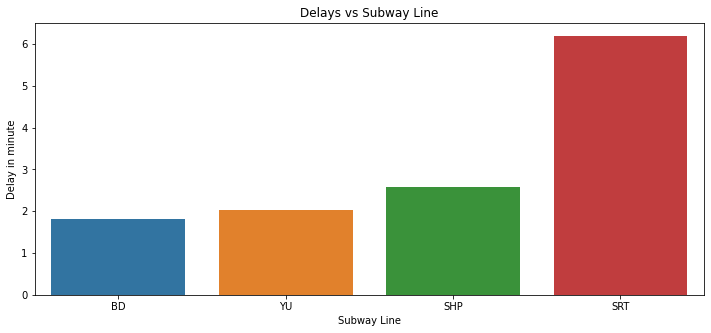

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x='line_simp', y='delay_min', data= subway_df, ci=None);
plt.title("Delays vs Subway Line")
plt.xlabel("Subway Line")
plt.ylabel("Delay in minute");

### Insights
- The SRT line having the longest delay time whilst having the least delay record.

### 4.7.5 Delays by Days of the Week and Subway Lines

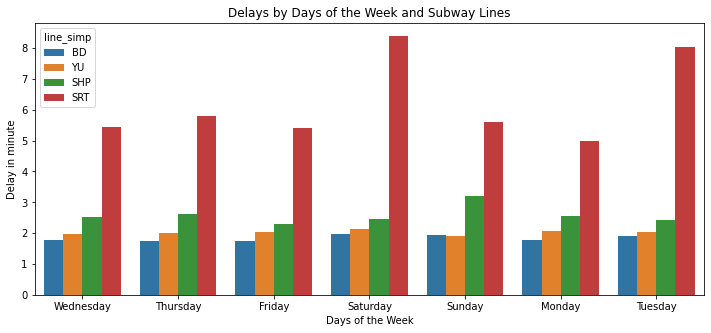

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x=subway_df.day_of_week, y=subway_df.delay_min,hue=subway_df.line_simp, ci=None);
plt.title("Delays by Days of the Week and Subway Lines")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");

### Insights:
- Line 3 Scarborough has the longest delay time on average for each day and it could go up to 8 mins.
- Line 1 Yonge-University and line 2 Bloor-Danforth have the most delay record but at the same time they don't have the longest delay time.

## 4.8 Using WordCloud to visualize the most recorded Station

In [26]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

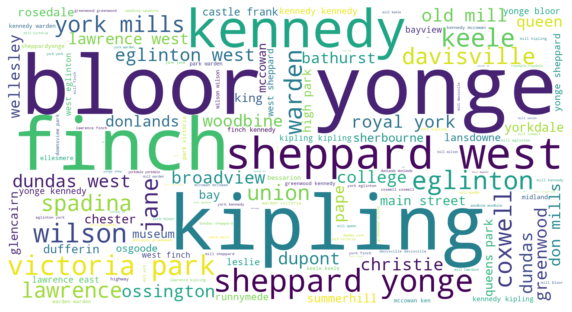

In [27]:
# Code from Ken Jee
# Only look at station
words = " ".join(only_station['station'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

unwanted = ['station']

text = " ".join([ele for ele in words_filtered if ele not in unwanted])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()